# House Price Prediction

Research Question : As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

Metric of Success : Creating a Regression Model that has the least MSE.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
House_df = pd.read_csv('HouseData.csv')

In [3]:
House_df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Getting Basic Data Info

In [4]:
#Getting the shape of the dataset
House_df.shape

(21613, 20)

In [5]:
#Getting Basic info about dataset
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [6]:
#Getting some statistics about the data
House_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
House_df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

# Data Cleaning and Preparation

In [10]:
#Checking for nulls
House_df.isnull().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#Checking for duplicates
House_df.duplicated().sum()

3

In [12]:
#Dropping Duplicates
House_df.drop_duplicates(keep='first', inplace=True)

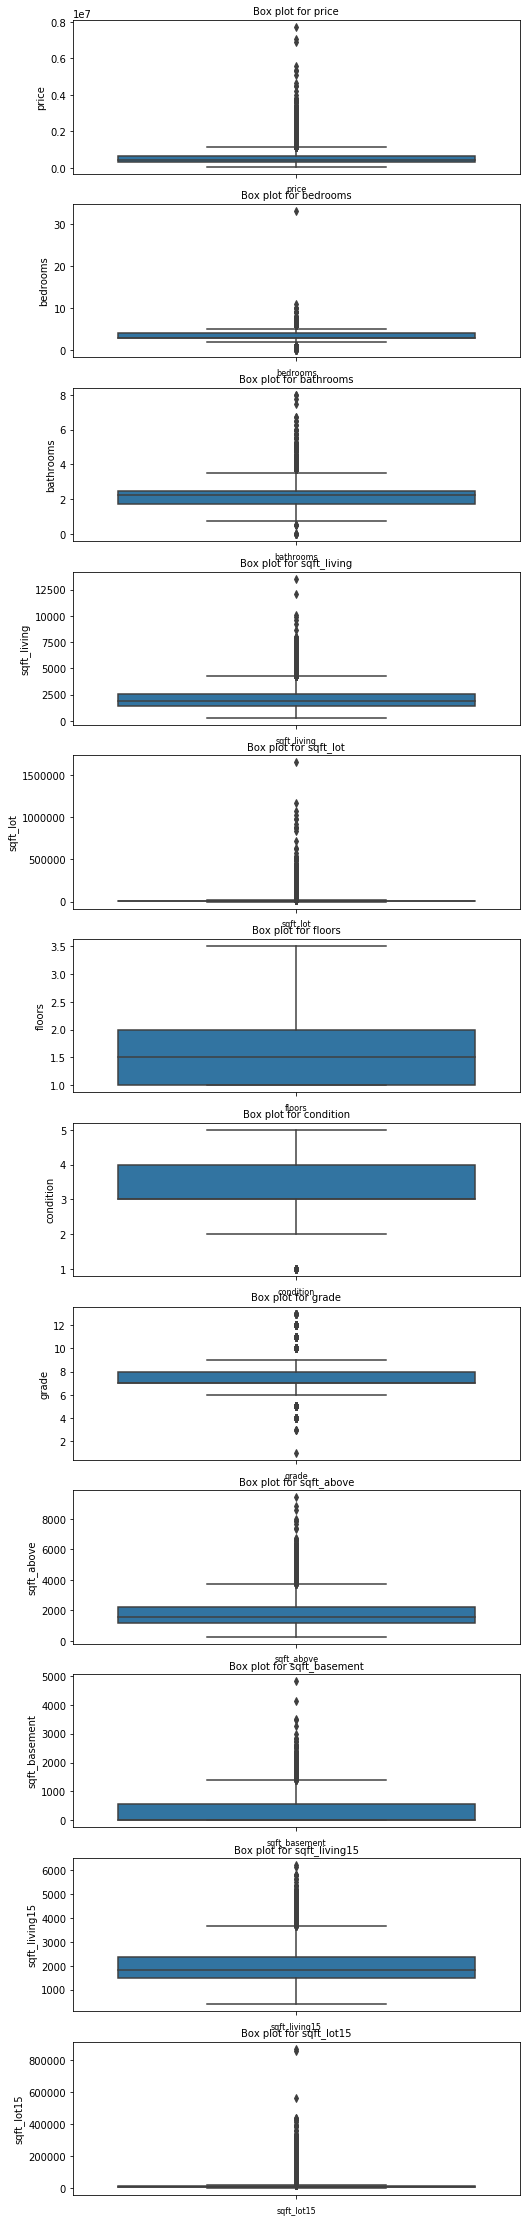

In [18]:
#Checking for outliers
#Checking for Outliers
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
             'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

fig, axes = plt.subplots(len(cols), figsize=(8,40))

for i, col_val in enumerate(cols):
        
    sns.boxplot(y=House_df[col_val], ax=axes[i])
    axes[i].set_title('Box plot for '+col_val, fontsize=10)
    axes[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [19]:
# Determining how many rows would be lost if outliers were removed

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = House_df.quantile(0.25)
Q3 = House_df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'auto'
# ---
# 
House_df_new = House_df[~((House_df < (Q1 - 1.5 * IQR)) | (House_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(House_df_new.shape)

# Printing the shape of our old dataset
# ---
#
print(House_df.shape)

# Number of rows removed

rows_removed = House_df.shape[0] - House_df_new.shape[0]
rows_removed

# Percentage of rows removed of the percentage
row_percent = (rows_removed/House_df.shape[0]) * 100
row_percent

(14935, 20)
(21610, 20)


30.888477556686716

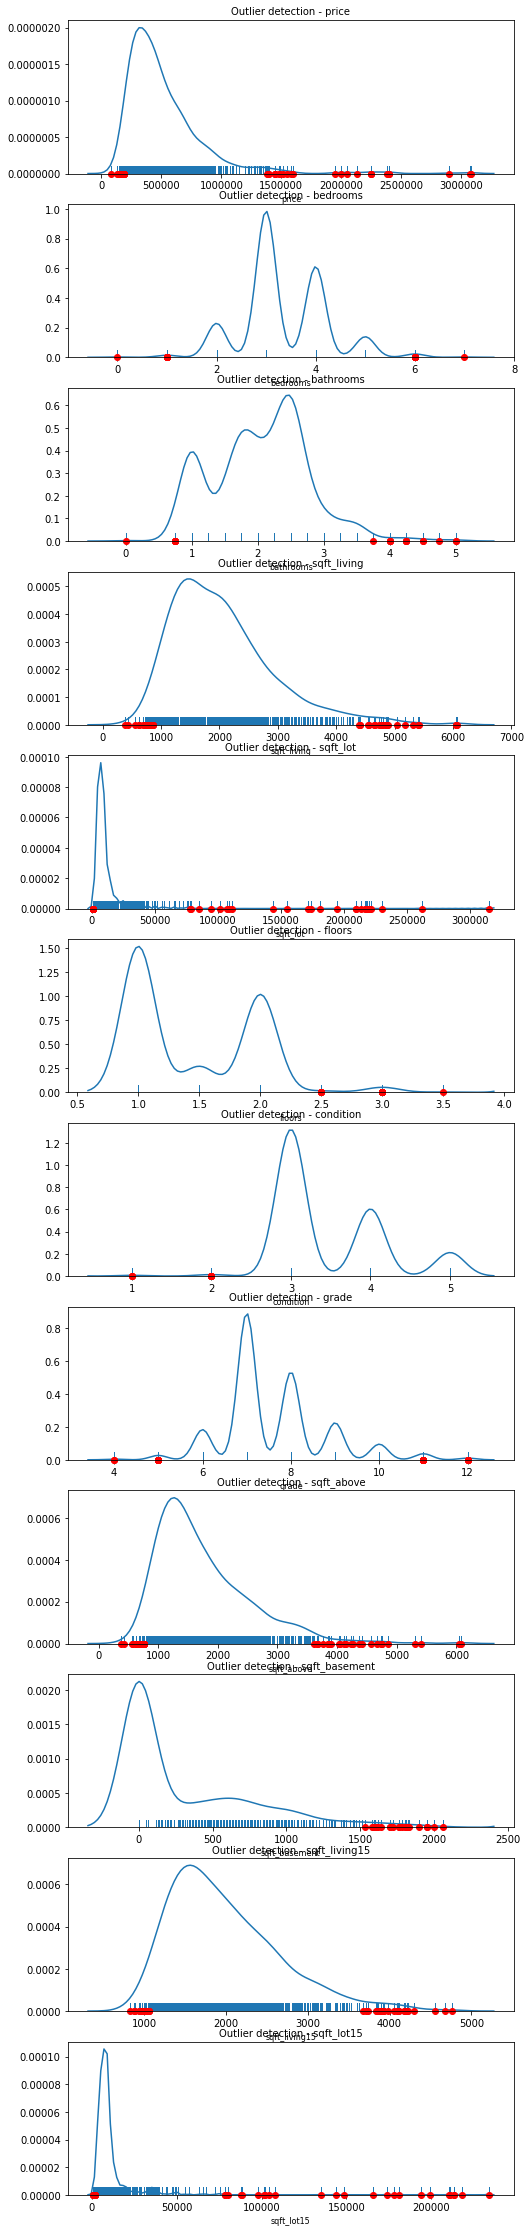

In [21]:
# Removing Outliers Using Percentile Based Removal(PBO) 
def pbo(data, threshold=95):
    diff = (100 - threshold) / 2.0
    mini, maxi = np.percentile(data, [diff, 100 - diff])
    return (data < mini) | (data > maxi)

fig, ax = plt.subplots(len(cols), figsize=(8,40))

for i, col_val in enumerate(cols):
    x = House_df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[pbo(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

# Models

# Multiple Linear Regression.

In [22]:
#Preparing the data
X = House_df.drop(['price'],axis=1)
y = House_df['price']

In [23]:
#Splitting Data into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
#Fiting the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#Predictions
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9790,680200.0,6.735433e+05
10280,550000.0,5.007666e+05
21572,230000.0,2.570706e+05
20060,379950.0,4.519542e+05
21204,1060000.0,8.113618e+05
14544,325250.0,2.331632e+05
15937,279000.0,3.845525e+05
1710,453000.0,3.977906e+05
12659,158000.0,2.128754e+05
21184,468500.0,4.275109e+05


In [27]:
#R2 Score
from sklearn.metrics import r2_score, mean_squared_error
print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: 0.7090661357935631


Barlett's Test


In [29]:

# Bartlett's test

import scipy as sp
residuals = y_pred - y_test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Computing critical value
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)



if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('Test Result is less than the Critical Value hence the variances are homogeneous')

Test Result is less than the Critical Value hence the variances are homogeneous


# `Lasso Regression

In [31]:
#Lasso Object
from sklearn import linear_model
lasso = linear_model.Lasso()

In [32]:
#Fit the model and scores
lasso.fit(X, y) 


print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.6999065053878633
lasso MSE: 40502836253.09117
lasso coef: [-1.30217016e-06 -3.57640343e+04  4.10936778e+04  2.85051023e+02
  1.21264264e-01  6.85000160e+03  5.82129183e+05  5.32071722e+04
  2.63175016e+04  9.61066053e+04 -1.03871893e+02 -1.34856748e+02
 -2.62437573e+03  1.98707024e+01 -5.82365029e+02  6.02457846e+05
 -2.12699989e+05  2.16337164e+01 -3.96333614e-01]


C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [34]:
from sklearn.model_selection import GridSearchCV
#regularization parameter
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
# Initializing  lasso
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 
# Fitting models 
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("Best Lasso Parameters are ::", gridlasso.best_params_) 
print("The lasso score is :", gridlasso.score(X_test, y_test))
print("The linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

lasso best parameters: {'alpha': 14.0}
lasso score: 0.7091299639711875
linear score: 0.7090661357935631
lasso MSE: 38226194850.72054
linear MSE: 38234583161.83071
lasso best estimator coef: [-1.19243562e-06 -3.64932689e+04  3.88958156e+04  2.84056940e+02
  1.48797566e-01  6.05461031e+03  6.38226554e+05  5.32726998e+04
  2.70496803e+04  9.53678190e+04 -1.03399385e+02 -1.32057962e+02
 -2.56728561e+03  2.01086913e+01 -5.72770751e+02  6.00638258e+05
 -2.15257811e+05  2.45554938e+01 -4.15948497e-01]
linear coef: [-1.18914625e-06 -3.65075398e+04  3.89430009e+04  1.10855573e+02
  1.49361591e-01  6.06999006e+03  6.40400404e+05  5.32019798e+04
  2.70959544e+04  9.53327588e+04  6.97895315e+01  4.10660414e+01
 -2.56551684e+03  2.01003935e+01 -5.74703377e+02  6.01530211e+05
 -2.16516547e+05  2.45973134e+01 -4.15287554e-01]


C:\Users\MURU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Ridge Regression

In [57]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print("The MSE for this model is : ",first_model) 

The MSE for this model is :  40502835945.841255


In [36]:
#Import libraries for Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Creating ridge model
ridge = Ridge(normalize=True)
# Setting up grid to be used
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [58]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
search.fit(X,y)
search.best_params_




{'alpha': 1e-05, 'l1_ratio': 0.8}

In [60]:
#fitting our model with the ridge information and finding the mean squared error
ridge = Ridge(normalize=True,alpha=1e-05)
ridge.fit(X, y)
second_model = (mean_squared_error(y_true=y, y_pred=ridge.predict(X)))
print("The MSE for this model is : ",second_model)

The MSE for this model is :  40502835952.516106


In [43]:
# Getting coefficients
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40816.25313552301,
 'bedrooms': -34538.36280637129,
 'condition': 26702.588282917477,
 'floors': 7457.078489841516,
 'grade': 94326.61024135168,
 'id': -1.286889407552586e-06,
 'lat': 597969.3160579434,
 'long': -211099.0013741692,
 'sqft_above': 90.93539283760623,
 'sqft_basement': 61.19255709430788,
 'sqft_living': 88.13192612326874,
 'sqft_living15': 24.440124153000536,
 'sqft_lot': 0.12018315952277726,
 'sqft_lot15': -0.3851360391845254,
 'view': 53221.98200760313,
 'waterfront': 578043.3218016993,
 'yr_built': -2559.915923891516,
 'yr_renovated': 20.962184990695228,
 'zipcode': -561.0127352883121}

# Elasic Net Regression


In [47]:
from sklearn.linear_model import ElasticNet

In [44]:

# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print("The MSE for this model is : ",first_model) 

The MSE for this model is :  40502835945.841255


In [45]:
# coefficients of this first model.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 41097.02169421736,
 'bedrooms': -35765.09285523206,
 'condition': 26320.949188304243,
 'floors': 6851.009206985128,
 'grade': 96103.92643767298,
 'id': -1.3019373806912694e-06,
 'lat': 602522.6696768922,
 'long': -212789.81785672624,
 'sqft_above': 70.72272785851965,
 'sqft_basement': 39.73314134951215,
 'sqft_living': 110.45586919167036,
 'sqft_living15': 21.63661274468177,
 'sqft_lot': 0.12130331217122148,
 'sqft_lot15': -0.39628209413422155,
 'view': 53202.022328321356,
 'waterfront': 582280.7276480456,
 'yr_built': -2624.247115895938,
 'yr_renovated': 19.869763725379016,
 'zipcode': -582.5038611266646}

In [48]:
#Elastic Net Model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [54]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_


{'alpha': 1e-05, 'l1_ratio': 0.8}

In [56]:
#setting alpha to 1e-05 and l1ratio to 0.8
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print("The MSE for this model is ",second_model)

The MSE for this model is  40603552898.53392


In [52]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 23093.223362315017,
 'bedrooms': 9156.854051183282,
 'condition': 5770.182510412847,
 'floors': 14352.222278294652,
 'grade': 22214.354169530536,
 'id': -2.822060796651917e-07,
 'lat': 117982.8424540259,
 'long': -19326.47326829625,
 'sqft_above': 26.883442017719215,
 'sqft_basement': 29.915314282676004,
 'sqft_living': 28.800350394764607,
 'sqft_living15': 31.19768716641074,
 'sqft_lot': 0.05851569926315103,
 'sqft_lot15': 0.06271024060542418,
 'view': 21963.3224518529,
 'waterfront': 143889.91655046298,
 'yr_built': -116.49160247081655,
 'yr_renovated': 14.782267573948936,
 'zipcode': -5.784219836076689}

An MSE of 40603552898.53392 is bigger than that for the linear regression. This means that  Elastic Net is doing worse than linear regression. 

# Quantile Regression

In [62]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []
#
mod = smf.quantreg('price ~ sqft_living', House_df)
# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['sqft_living']] + res.conf_int().loc['sqft_living'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

C:\Users\MURU\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:188: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)


    qt     intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.1  42836.363625  123.636364      121.910844      125.361883
1  0.2  34093.556935  151.809356      149.768675      153.850036
2  0.3  28294.573651  178.682171      175.967625      181.396716
3  0.4  33434.083833  201.463473      198.244349      204.682597
4  0.5  52696.035244  216.740088      213.230524      220.249652
5  0.6  72811.447812  230.639731      227.224993      234.054469
6  0.7  84736.301368  251.027397      246.984937      255.069857
7  0.8  86602.872168  287.081339      281.563939      292.598738
8  0.9  54209.999992  371.000000      362.604339      379.395661


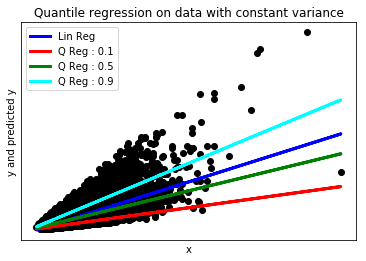

In [65]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 

x_ = House_df['sqft_living'].values.reshape(-1,1)
y_ = House_df['price'].values
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

# Plotting the 0.1th, 0.5th and 0.9th quantile models against the original data.

plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['sqft_living'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['sqft_living'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['sqft_living'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with constant variance")
plt.legend()

C:\Users\MURU\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


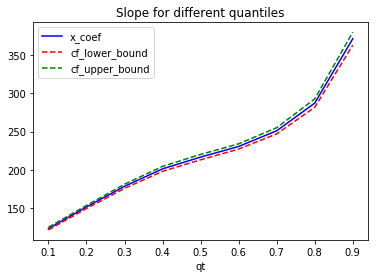

In [71]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
    title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()